In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [299]:
data = pd.read_csv("cleaned_weather_data.csv")

ETAPE 1 

In [301]:
data["Date"] = pd.to_datetime(data["Date"]).dt.month

In [303]:
temperature_moyenne = data.groupby(pd.Grouper(key="Date"))['Temperature'].mean()
precipitation_totale = data.groupby(pd.Grouper(key="Date"))['Precipitation'].sum()
humidity_moyenne = data.groupby(pd.Grouper(key="Date"))['Humidity'].mean()
results = pd.concat([temperature_moyenne,precipitation_totale,humidity_moyenne],axis=1)
results = results.reset_index()

In [305]:
results

,Date,Temperature,Precipitation,Humidity
0,1,14.198077,235,56.465385
1,2,20.418421,150,64.190789
2,3,24.212048,140,69.531325
3,4,24.503797,120,70.086076
4,5,19.910390,125,66.232468
5,6,14.080233,145,55.432558
6,7,6.245349,145,45.636047
7,8,-0.370238,145,38.344048
8,9,-3.963158,160,34.551316
9,10,-4.562025,130,33.394937


In [315]:
# Filtrer les mois où les précipitations sont supérieures à la médiane des précipitations mensuelles
mediane = results["Precipitation"].median()
mois_avec_max_precipitations = results[results['Precipitation'] == mediane]["Date"].values
print("Les mois avec les plus fortes précipitations sont :", mois_avec_max_precipitations)

Les mois avec les plus fortes précipitations sont : [6 7 8]


ETAPE 2:

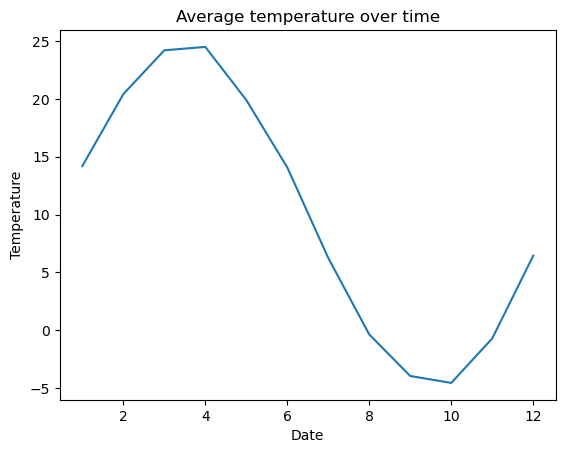

La mois où la température moyenne est la plus elevé est : 4
les mois ne suivent pas une tendence saisonnière logique car les données sont générée aléatoirement


In [258]:
sns.lineplot(data=results, x="Date", y="Temperature")
plt.title("Average temperature over time")
plt.show()
print("La mois où la température moyenne est la plus elevé est :",results[results['Temperature'] == results['Temperature'].max()]["Date"].iloc[0])
print("les mois ne suivent pas une tendence saisonnière logique car les données sont générée aléatoirement")

ETAPE 3 :

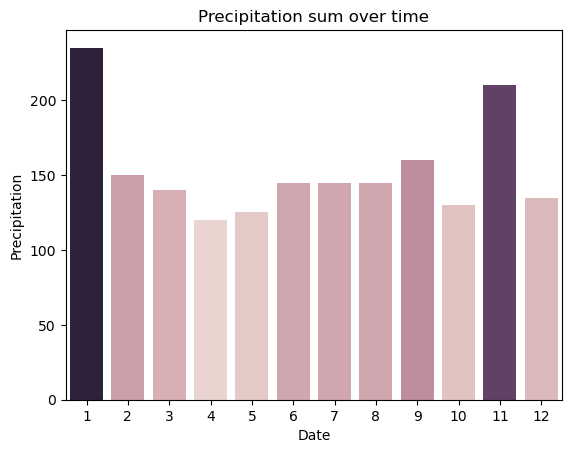

Les mois avec les plus fortes Precipitations sont : Janvier , Novembre


In [252]:
sns.barplot(data=results, x="Date", y="Precipitation",hue='Precipitation',legend=False)
plt.title("Precipitation sum over time")
plt.show()
print("Les mois avec les plus fortes Precipitations sont : Janvier , Novembre")

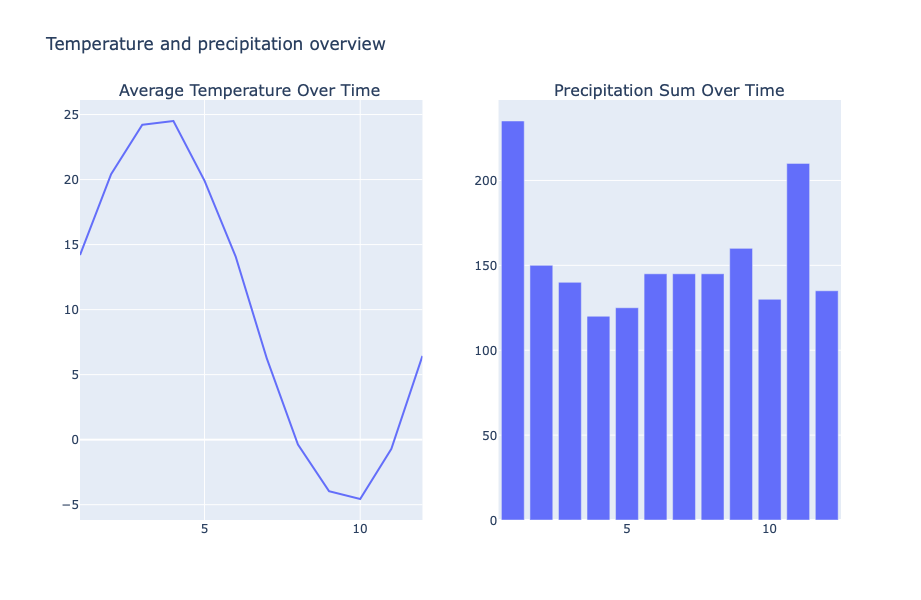

In [317]:
temperature_fig = px.line(results, x='Date', y='Temperature', title="Average Temperature Over Time")

precipitation_fig = px.bar(results, x='Date', y='Precipitation', title="Precipitation Sum Over Time")

fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Average Temperature Over Time", "Precipitation Sum Over Time"),
    horizontal_spacing=0.1,  # Adjust space between plots
)

for trace in temperature_fig.data:
    fig.add_trace(trace, row=1, col=1)

for trace in precipitation_fig.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    height=600,  # Adjust overall figure height
    title_text="Temperature and precipitation overview",
    showlegend=False 
)

fig.show()